# ATOC 568 - Data analysis

Please refer to the instructions posted on *myCourses > Assignments > Data analysis* for a presentation of the objectives and a description of the assignment as well as for the evaluation.

## Set up the modules

- Import the modules you will need to do the analysis by running: <br> *import module_name as name* <br> For instance, to import the numpy module and compute an average :  
> import numpy as np <br>
> np.mean()

- You can import other modules later as needed by going back to this cell (e.g. xarray). Note that there is no reason to import all the modules at the same time. This is just for clarity of the code.


- Modules installed in the JupyterHub environment are the following : <br>
 > numpy, xarray, pylab (matplotlib.pyplot), cartopy, seawater, datetime
 
- If you absolutely need another module, ask us and we'll relay your needs to Ambrish. Note that all the work can be done with the already installed modules. 

In [1]:
# module necessary to display the images from png files
from IPython.display import Image

In [2]:
#importing all modules
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.mpl.gridliner as gridliner
import matplotlib.ticker as mticker
import seawater as sw
import datetime
import warnings
warnings.simplefilter('ignore')

## Load Data

Open the netcdf file that contains the data (named **Data_Analysis_ATOC568**) which is on the  **/home/shared/** directory.

We suggest using xarray to load the data. Here is one example of how to open a file called *filename* and to load a variable called *lat* into an array called *latitude* (name of your choice) from this file: 
>ds = xarray.open_dataset(filename)<br>
>latitude = ds.lat.values

You can find the names and description of the variables by running the following in Jupyter Notebook
> ds

and the description of the variables (name, units) by looking at their attributes, either on the display (second to last column on the right) or by running the command (e.g. to get the description of variable *my_variable*)

> ds['my_variable'].attrs


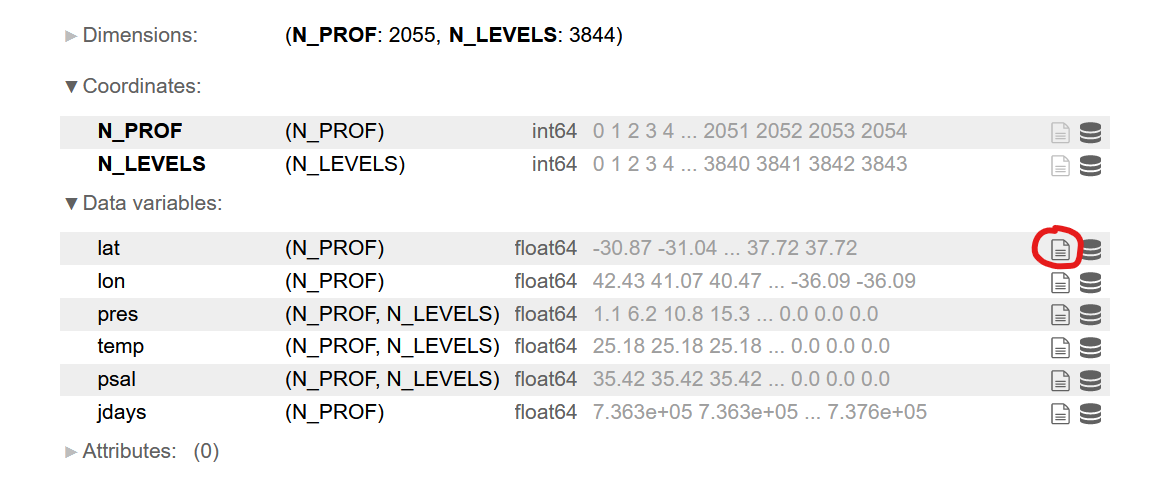

In [3]:
Image(filename='/home/shared/xarray_exemple.png') 

In [4]:
#print('Load all the data here')
#==========================================

path='/home/shared/'
ds=xr.open_dataset(path+'Data_Analysis_ATOC568.nc', decode_times=False)
ds

<xarray.Dataset>
Dimensions:   (N_PROF: 2368, N_LEVELS: 3844)
Coordinates:
  * N_PROF    (N_PROF) int64 0 1 2 3 4 5 6 ... 2362 2363 2364 2365 2366 2367
  * N_LEVELS  (N_LEVELS) int64 0 1 2 3 4 5 6 ... 3838 3839 3840 3841 3842 3843
Data variables:
    fnum      (N_PROF) float64 ...
    lat       (N_PROF) float64 ...
    lon       (N_PROF) float64 ...
    pres      (N_PROF, N_LEVELS) float64 ...
    temp      (N_PROF, N_LEVELS) float64 ...
    psal      (N_PROF, N_LEVELS) float64 ...
    jdays     (N_PROF) float64 ...

## Plot the trajectory for your float on a global map

Create a figure that displays the globe and shows all floats trajectories. You can use the package called cartopy to display the globe and the scatter function from pylab.
> import cartopy.crs as ccrs

Documentation on the different projections proposed in this package and on how to use them can be found here: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html



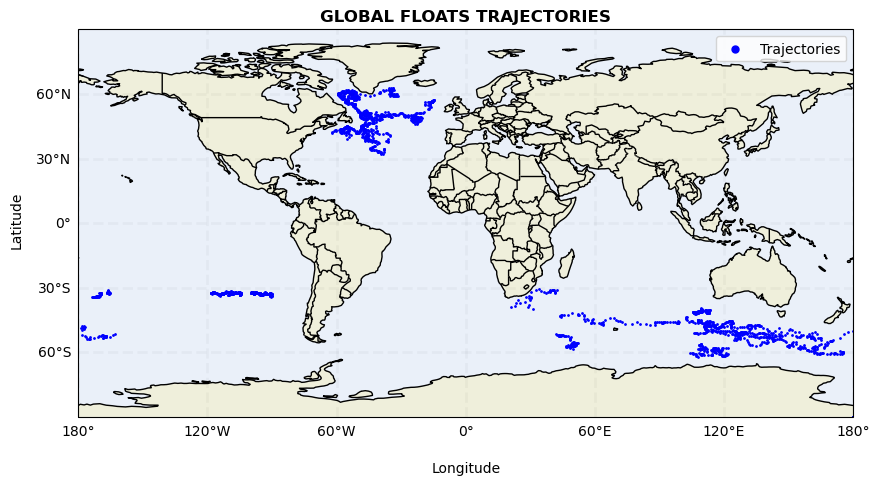

In [5]:
#print('Make your plot here')
#==========================================

# Create a subplot with PlateCarree projection and size of 10x8 inches
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection':ccrs.PlateCarree()})

# Add map features: coastline, ocean, land, and borders
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.OCEAN, alpha=0.2)
ax.add_feature(cf.LAND)
ax.add_feature(cf.BORDERS)

# Set the extent of the map to show the whole world
ax.set_extent([-180,180,-90,90], crs=ccrs.PlateCarree())

# Add a scatter plot of the float trajectories
ax.scatter(ds.lon[:],ds.lat[:],s=1, transform=ccrs.PlateCarree(), color='blue', label='Trajectories')

# Add axis labels and a title
ax.text(-0.07, 0.51, 'latitude'.title(), va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor', transform=ax.transAxes)
ax.text(0.5, -0.15, 'longitude'.title(), va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', transform=ax.transAxes)
ax.set_title('Global Floats Trajectories'.upper(), {'fontweight':'bold' })

# Add gridlines with labels for latitude and longitude
gl=ax.gridlines(draw_labels=True, linewidth=2, color='black', alpha=0.03, linestyle='--', crs=ccrs.PlateCarree())
gl.xlabels_bottom, gl.ylabels_left= True, True
gl.xlabels_top, gl.ylabels_right = False, False
gl.xformatter = gridliner.LongitudeFormatter()
gl.yformatter = gridliner.LatitudeFormatter()

# Add a legend with a larger marker size
ax.legend(markerscale=5)

# Display the plot
plt.show()

## Pick one float to follow

From here, you will follow and analyze only one float from the file. You must have been assigned one float from the following list where the numbers correspond to the float identification number (variable called fnum):
- Sea ice zone: fnum = 5900159
- Antarctic Circumpolar Current: fnum = 5900280
- Agulhas current: fnum = 1902076 
- Labrador Current: fnum= 4900555
- Slope Sea: fnum = 4901076
- Gulf Stream: fnum = 4901093

In [6]:
print('I have float number : 1902076')

I have float number : 1902076


## Load data from the specific float you chose and interpolate it on pressure levels

Repeat what you did in step 3 but with loading only the data corresponding to the float you chose. 

In [7]:
#print('Load your data here')
#==========================================

# Specify the float number to filter
fnum = 1902076

# Use the "where" method to filter the dataset
filtered_ds = ds.where(ds.fnum == fnum, drop=True)
filtered_ds

<xarray.Dataset>
Dimensions:   (N_PROF: 36, N_LEVELS: 3844)
Coordinates:
  * N_PROF    (N_PROF) int64 0 1 2 3 4 5 6 7 8 9 ... 27 28 29 30 31 32 33 34 35
  * N_LEVELS  (N_LEVELS) int64 0 1 2 3 4 5 6 ... 3838 3839 3840 3841 3842 3843
Data variables:
    fnum      (N_PROF) float64 1.902e+06 1.902e+06 ... 1.902e+06 1.902e+06
    lat       (N_PROF) float64 -30.87 -31.04 -30.91 ... -39.08 -39.8 -38.25
    lon       (N_PROF) float64 42.43 41.07 40.47 40.33 ... 28.71 31.18 29.27
    pres      (N_PROF, N_LEVELS) float64 1.1 6.2 10.8 15.3 ... nan nan nan nan
    temp      (N_PROF, N_LEVELS) float64 25.18 25.18 25.18 25.18 ... nan nan nan
    psal      (N_PROF, N_LEVELS) float64 35.42 35.42 35.42 35.42 ... nan nan nan
    jdays     (N_PROF) float64 7.363e+05 7.363e+05 ... 7.367e+05 7.367e+05

Interpolate your data (temperature, salinity) onto pressure levels. To do so:

1/ Define an array of pressure levels

$\rightarrow$ we suggest using about 100 to 120 levels between the surface and 2000 m depth, with finer vertical resolution close to the surface than at depth.

2/ Interpolate your fields, you can use: 
> numpy.interp

In [8]:
#print('Interpolate it here')
#==========================================

# Define pressure levels with finer vertical resolution near the surface and coarser resolution at greater depths
new_pres = np.concatenate((np.linspace(0, 100, num=70,endpoint=False),
                           np.linspace(100, 1000, num=30, endpoint=False),
                           np.linspace(1000, 2000, num=20)))

# Interpolate temperature onto the new pressure levels
new_temp = np.zeros((len(filtered_ds.N_PROF), len(new_pres)))
new_sal = np.zeros((len(filtered_ds.N_PROF), len(new_pres)))
for i in range(len(filtered_ds.N_PROF)):
    new_temp[i,:] = np.interp(new_pres, filtered_ds.pres[i,:], filtered_ds.temp[i,:])
    new_sal[i,:] = np.interp(new_pres, filtered_ds.pres[i,:], filtered_ds.psal[i,:])

# Create a new dataset with the interpolated temperature and salinity
interp_ds = xr.Dataset({'temp': (['N_PROF', 'N_LEVELS'], new_temp), 'psal': (['N_PROF', 'N_LEVELS'], new_sal),
                       'pres': (['N_LEVELS'], new_pres),}, coords={'N_PROF': filtered_ds.N_PROF,
                                                                  'N_LEVELS': np.arange(len(new_pres))})
interp_ds['lat'] = filtered_ds['lat']
interp_ds['lon'] = filtered_ds['lon']
interp_ds['jdays'] = filtered_ds['jdays']
interp_ds['fnum'] = filtered_ds['fnum']
interp_ds

<xarray.Dataset>
Dimensions:   (N_PROF: 36, N_LEVELS: 120)
Coordinates:
  * N_PROF    (N_PROF) int64 0 1 2 3 4 5 6 7 8 9 ... 27 28 29 30 31 32 33 34 35
  * N_LEVELS  (N_LEVELS) int64 0 1 2 3 4 5 6 7 ... 113 114 115 116 117 118 119
Data variables:
    temp      (N_PROF, N_LEVELS) float64 25.18 25.18 25.18 ... 2.941 2.906 2.876
    psal      (N_PROF, N_LEVELS) float64 35.42 35.42 35.42 ... 34.67 34.69 34.71
    pres      (N_LEVELS) float64 0.0 1.429 2.857 ... 1.895e+03 1.947e+03 2e+03
    lat       (N_PROF) float64 -30.87 -31.04 -30.91 ... -39.08 -39.8 -38.25
    lon       (N_PROF) float64 42.43 41.07 40.47 40.33 ... 28.71 31.18 29.27
    jdays     (N_PROF) float64 7.363e+05 7.363e+05 ... 7.367e+05 7.367e+05
    fnum      (N_PROF) float64 1.902e+06 1.902e+06 ... 1.902e+06 1.902e+06

Use the interpolated temperature and salinity on the pressure levels from here.

## Convert in situ temperature to potential temperature

Convert in situ temperature to potential temperature referenced to the surface. You can use the function called ptmp from the package called seawater.
You can look at how to use the function by typing: 
> help(seawater.eos80.ptmp)

Convert time from julian days to dates (check the attributes of the variable to get the original reference date). You can use the package called datetime.<br>
→ Documentation: https://docs.python.org/2/library/datetime.html<br>
→ Tip: Use a combination of datetime.date and datetime.timedelta as follows:
> datetime.date(1,1,1) + datetime.timedelta(numpy.float(timo[k]))

where timo is the array of time of your float in julian days, and k an index. This line will return a date in the form of year, month and day.

In [9]:
#print('Do the conversion of temperature')
#==========================================

# Compute potential temperature referenced to the surface
ptmp = sw.eos80.ptmp(interp_ds['psal'], interp_ds['temp'], interp_ds['pres'], pr=0)

# Adding the potential temperature variable to the dataset
interp_ds['ptmp'] = (('N_PROF', 'N_LEVELS'), ptmp)
interp_ds['ptmp']

<xarray.DataArray 'ptmp' (N_PROF: 36, N_LEVELS: 120)>
array([[25.18199921, 25.18181659, 25.18206551, ...,  2.51277566,
         2.48944408,  2.45751632],
       [25.64999962, 25.63290085, 25.59967769, ...,  2.59979513,
         2.56225525,  2.547907  ],
       [24.9109993 , 24.9109315 , 24.91330136, ...,  2.7775579 ,
         2.69755181,  2.6322718 ],
       ...,
       [19.76199913, 19.76207842, 19.76560674, ...,  2.73338348,
         2.68753215,  2.65421512],
       [19.6779995 , 19.67917886, 19.68219142, ...,  2.6490187 ,
         2.6116007 ,  2.58149384],
       [        nan,         nan,         nan, ...,  2.79952085,
         2.76088135,  2.72646785]])
Coordinates:
  * N_PROF    (N_PROF) int64 0 1 2 3 4 5 6 7 8 9 ... 27 28 29 30 31 32 33 34 35
  * N_LEVELS  (N_LEVELS) int64 0 1 2 3 4 5 6 7 ... 113 114 115 116 117 118 119

In [10]:
#print('Convert julian days to datetime')
#==========================================

# Define a function to convert time offsets to datetime objects
def convert_time_offset(t):
    # Compute the number of days since January 1, 1
    days = int(t)
    # Compute the number of microseconds (fractions of a second) since midnight
    microseconds = int((t - days) * 86400 * 1e6)
    # Create a datetime object representing January 1, 1
    base_date = datetime.date(1, 1, 1)
    # Add the number of days and microseconds to the base date to get the final datetime object
    return base_date + datetime.timedelta(days=days, microseconds=microseconds)

# Convert the time variable to datetime objects
time_dates = [convert_time_offset(t) for t in interp_ds['jdays'].values]

# Add the datetime variable to the dataset
interp_ds['time'] = (('N_PROF',), time_dates)

time = xr.DataArray(interp_ds.time, dims='N_PROF')
interp_ds['time'] = time.astype('datetime64')
interp_ds['time']

<xarray.DataArray 'time' (N_PROF: 36)>
array(['2016-12-29T00:00:00.000000000', '2017-01-08T00:00:00.000000000',
       '2017-01-18T00:00:00.000000000', '2017-01-28T00:00:00.000000000',
       '2017-02-07T00:00:00.000000000', '2017-02-17T00:00:00.000000000',
       '2017-02-27T00:00:00.000000000', '2017-03-09T00:00:00.000000000',
       '2017-03-19T00:00:00.000000000', '2017-03-29T00:00:00.000000000',
       '2017-04-08T00:00:00.000000000', '2017-04-18T00:00:00.000000000',
       '2017-04-28T00:00:00.000000000', '2017-05-08T00:00:00.000000000',
       '2017-05-18T00:00:00.000000000', '2017-05-28T00:00:00.000000000',
       '2017-06-07T00:00:00.000000000', '2017-06-17T00:00:00.000000000',
       '2017-06-27T00:00:00.000000000', '2017-07-07T00:00:00.000000000',
       '2017-07-17T00:00:00.000000000', '2017-07-27T00:00:00.000000000',
       '2017-08-06T00:00:00.000000000', '2017-08-16T00:00:00.000000000',
       '2017-08-26T00:00:00.000000000', '2017-09-05T00:00:00.000000000',
       '2017-09-15T00:00:00.000000000', '2017-09-25T00:00:00.000000000',
       '2017-10-05T00:00:00.000000000', '2017-10-15T00:00:00.000000000',
       '2017-10-25T00:00:00.000000000', '2017-11-04T00:00:00.000000000',
       '2017-11-14T00:00:00.000000000', '2017-11-24T00:00:00.000000000',
       '2017-12-04T00:00:00.000000000', '2017-12-14T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * N_PROF   (N_PROF) int64 0 1 2 3 4 5 6 7 8 9 ... 27 28 29 30 31 32 33 34 35

## Plot the temperature and salinity at the surface along the float trajectory

- Create two figures with the temperature at the surface and the salinity at the surface respectively, along the float trajectory.
- Optional: you can use cartopy for your plot to make the continents appear by producing a regional plot (set the geographical boundaries of your map).

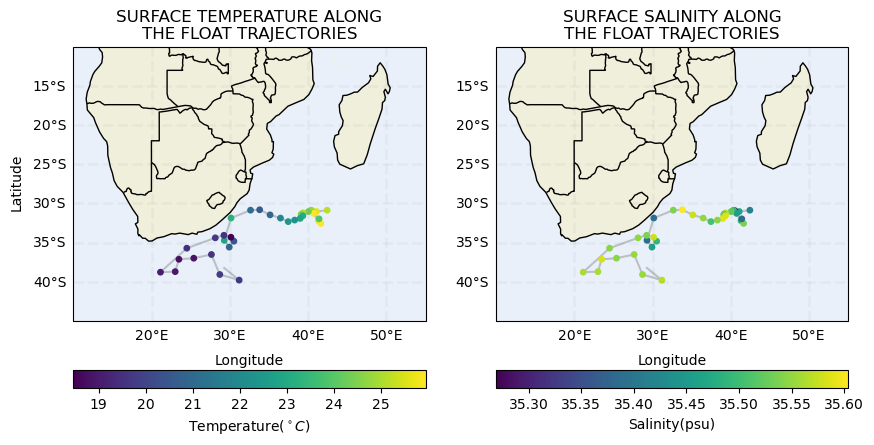

In [11]:
#print('Plot here your figure with two panels')
#==========================================

# Create a figure with two subplots
fig = plt.figure(figsize=(10, 8))
data = ['temp', 'psal']
for i, v in enumerate(data):
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(1, 2, i+1, projection=ccrs.PlateCarree())
    
    # Plot the variable data on the map using scatter
    cb = ax.scatter(interp_ds.lon, interp_ds.lat, c=interp_ds[v][:, 0],s=15, transform=ccrs.PlateCarree(), zorder=2)
    plt.plot(interp_ds.lon, interp_ds.lat, c='black', alpha=0.2, zorder=1)
    
    # Add map features such as coastline, states, and land
    ax.add_feature(cf.COASTLINE.with_scale('110m'))
    ax.add_feature(cf.STATES.with_scale('110m'))
    ax.add_feature(cf.OCEAN, alpha=0.2)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.BORDERS)
    
    # Set the extent of the map and add a colorbar
    ax.set_extent([10, 55, -10, -45], crs=ccrs.PlateCarree())
    cbar = plt.colorbar(cb, orientation='horizontal', pad=0.08)
    
    # Add axis labels and a title for each subplot
    ax.text(0.5, -0.17, 'longitude'.title(), va='bottom', ha='center', rotation='horizontal',
            rotation_mode='anchor', transform=ax.transAxes)
    if v == 'temp':
        ax.set_title('Surface Temperature along\nthe float trajectories'.upper())
        cbar.set_label('Temperature(${^\circ}C$)')
        ax.text(-0.14, 0.51, 'latitude'.title(), va='bottom', ha='center', rotation='vertical',
                rotation_mode='anchor', transform=ax.transAxes)
    elif v == 'psal':
        ax.set_title('Surface Salinity along\nthe float trajectories'.upper())
        cbar.set_label('Salinity(psu)')
    
    # Add gridlines to the map
    gl = ax.gridlines(draw_labels=True, linewidth=2, color='black', alpha=0.03, linestyle='--',
                      crs=ccrs.PlateCarree())
    gl.xlabels_bottom, gl.ylabels_left = True, True
    gl.xlabels_top, gl.ylabels_right = False, False
    gl.xformatter = gridliner.LongitudeFormatter()
    gl.yformatter = gridliner.LatitudeFormatter()

# Show the plot
plt.show()

<u>**Question 1**</u>
- Comment on the trajectory of the float (i.e. is the trajectory straight? Are there specific   features? Does the float travel far over its life time?)   
- Can you guess which current(s) the float drifts in?
Hint: You can look at descriptive oceanography textbooks or papers documenting the  circulation of the region to find a description of the circulation.

<u>**Answer**</u>

- The trajectory of the float is non-linear. Along the non-linear path, there are some quasi circular part which can be seen between $34 {^\circ}S $ and $36 {^\circ}S$ and $32 {^\circ}S $ and $33{^\circ}S$. Overall, the trajectory of agro floats in the Agulhas Current is influenced by a complex interplay of oceanographic and environmental factors. One of the most notable features of the region is its strong, narrow flow. This leads to rapid transport of materials and can make it difficult for agro floats to navigate. The plot shows a significant variation in temperature and/or salinity, it may indicate that the float has traveled a significant distance over time. This is because ocean water temperature and salinity can vary widely depending on the location and depth, so a float that has traveled over a large distance is likely to have encountered a variety of water masses with different temperature and salinity values.

- The float drifts in the Agulhas Current and Return Current. The Agulhas Current is a strong western boundary current that flows along the east coast of South Africa and then turns eastward towards the southern Indian Ocean. It is known for its high variability and transport of warm and salty Indian Ocean water towards the Atlantic Ocean. It also drifts in Mozambique current.

## Plot vertical profiles of temperature, salinity and density 

Compute the potential density referenced at the surface ($\sigma_0$) from the function called pdens using the package called seawater. You can look at how to use the function by typing:
> seawater.pden?

In [12]:
#print('Do your conversions here')
#==========================================

# Compute potential density referenced to the surface
pden = sw.pden(interp_ds['psal'], interp_ds['temp'], interp_ds['pres'], pr=0)
pden=pden-1000
# Add the potential density variable to the dataset
interp_ds['pden'] = (('N_PROF', 'N_LEVELS'), pden)
interp_ds['pden']

<xarray.DataArray 'pden' (N_PROF: 36, N_LEVELS: 120)>
array([[23.60086325, 23.60096779, 23.60110319, ..., 27.68472571,
        27.69824866, 27.70720041],
       [23.49155085, 23.49880946, 23.51294186, ..., 27.663864  ,
        27.67830005, 27.69449238],
       [23.5716108 , 23.57161115, 23.57066655, ..., 27.66153356,
        27.68153699, 27.69213442],
       ...,
       [25.24559326, 25.24549236, 25.24367634, ..., 27.66583931,
        27.68345879, 27.69662557],
       [25.27983221, 25.27942349, 25.27840756, ..., 27.7012373 ,
        27.71717145, 27.72847179],
       [        nan,         nan,         nan, ..., 27.64142413,
        27.65713723, 27.67491267]])
Coordinates:
  * N_PROF    (N_PROF) int64 0 1 2 3 4 5 6 7 8 9 ... 27 28 29 30 31 32 33 34 35
  * N_LEVELS  (N_LEVELS) int64 0 1 2 3 4 5 6 7 ... 113 114 115 116 117 118 119

Create a figure with 3 panels side by side (i.e. one row and 3 columns) displaying potential temperature, salinity and σ0 against pressure. In each panel, plot two profiles: one in summer time (in red) and one in winter time (in blue).
For this plot, you can use the plot function from the matplotlib.pyplot (equivalently pylab)  package for instance. To import matplotlib.pyplot and look at how to use plot, type:
> import matplotlib.pyplot as plt <br>
> plt.plot?

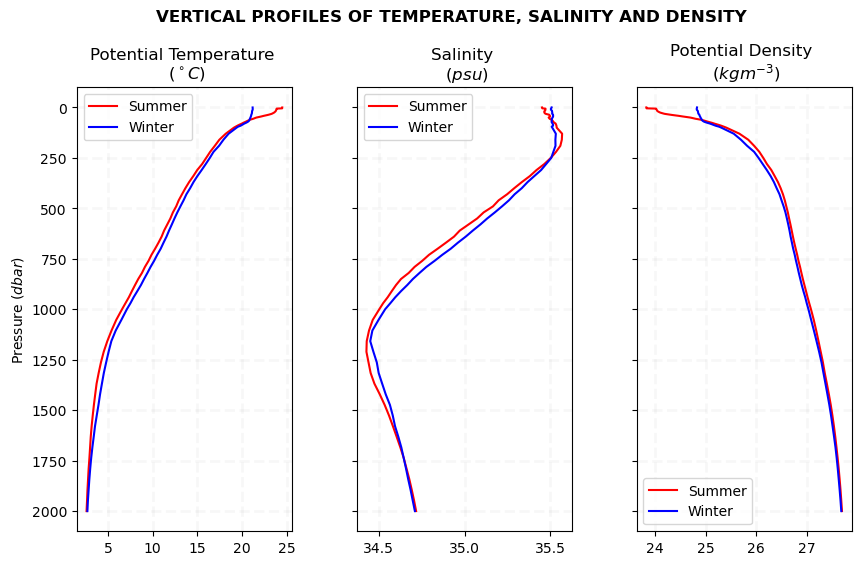

In [13]:
#print('Plot your profiles here')
#==========================================

#Define a function to separate data into summer and winter season
def season_time(data):
    time = interp_ds['time'] 
    summer_val=data.where((time.dt.month == 12) | (time.dt.month <= 2), drop=True)
    winter_val=data.where((time.dt.month >= 6) & (time.dt.month <= 8), drop=True)
    return summer_val, winter_val

#Separate temperature, salinity, and density data for summer and winter seasons using the function
summer_ptmp,winter_ptmp=season_time(interp_ds.ptmp)
summer_psal,winter_psal=season_time(interp_ds.psal)
summer_pden,winter_pden=season_time(interp_ds.pden)

#Create a figure with 3 subplots to display vertical profiles of temperature, salinity, and density
fig, ax = plt.subplots(1, 3, figsize=(10,6), sharey=True) 
data=[summer_ptmp, summer_psal, summer_pden, winter_ptmp, winter_psal, winter_pden]
title=['Potential Temperature \n (${^\circ}C$)', 'Salinity \n ($psu$)', 'Potential Density \n ($kgm^{-3}$)']
for i in range (3):
    ax[i].plot(data[i].mean(dim='N_PROF'), interp_ds.pres,  color='red', label='Summer' )
    ax[i].plot( data[i+3].mean(dim='N_PROF'),interp_ds.pres, color='blue', label='Winter' )
    ax[i].invert_yaxis()
    ax[i].legend()
    ax[i].set_title(title[i])
    ax[i].grid(color='black', alpha=0.03, linestyle='--',linewidth=2)
    if i==0:
        ax[i].set_ylabel('Pressure $(dbar)$')
    
#Add a title to the entire figure and adjust the spacing between subplots
plt.suptitle('Vertical profiles of Temperature, Salinity and Density'.upper(), fontweight='bold')
plt.subplots_adjust(wspace=0.3, top=0.85)

#Show the plot
plt.show()

<u>**Question 2**</u>
- Describe the general vertical profile of each variable and comment on the stratification.
- How does each profile vary  with season? Which part of the profile varies most?

<u>**Answer**</u>
- <b>Potential Temperature Profile </b>: The vertical profile shows warm water at the surface, with temperature decreasing rapidly with depth. In the deeper parts of the current, the water is relatively cold, with temperatures ranging from $2-5 {^\circ}C$.

  <b>Salinity Profile </b>: The salinity vertical profile is characterized by a relatively high salinity at the surface, with values ranging between $35.4-35.5 psu$ which slightly increased to $35.6 psu$ at about $130dbar$. Then, the salinity gradually decreases with depth, reaching a minimum value of around $34.4 psu$ at a depth of about $1000 dbar$. Below $1000 dbar$., the salinity starts to increase again with depth, reaching a maximum value of around $34.7 psu$ at a depth of $2000 dbar$.
  
  <b>Potential Density Profile </b>: The vertical profile  shows a less dense water at the surface, with density increasing with depth. The denser water is located at greater depths, with maximu density of $27.7 kgm^{-3}$
  
    **Overall, the vertical profiles of the variables shows a  strong and steep vertical gradient with warm surface waters transitioning rapidly to colder waters at depth. This strong vertical gradient generally implies a strong stratification.**

  
- <b>Potential Temperature Profile </b>: The profile shows stronger surface water temperature in the summer months  with temperatures typically ranging between $24-26{^\circ}C$ than the winter months which ranges between $21-23{^\circ}C$. The thermocline is stronger for the summer months than the winter month, thus the winter months has weaker stratification has compared to the summer. 

  <b>Salinity Profile </b>: The salinity profile show higher saline water at the surface in the winter months with maximum salinity of about $35.62 psu$ than the summer months of about $35.61 psu$ but the halocline is stronger for the summer months than the winter month, thus the winter months has weaker stratification has compared to the summer.
  
  <b>Potential Density Profile </b>: The density profile shows a less dense surface water in the summer months  with density typically ranging between$23.8 -24 kgm^{-3}$ than the winter months of about $24.8{^\circ}C$. The pynocline is stronger for the summer months than the winter month, thus the winter months has weaker stratification has compared to the summer.
  
    **Overall, the surface part of the profiles shows most variation because it is most directly influenced by physical and biological processes occurring at the air-sea interface. The potential density profiles shows that the potential temperature is the dominant driving force for its variation. The Density is the mirror of the temperature.**
    

## Plot the properties along the float trajectory

Calculate the mixed layer depth along the float trajectory using a density gradient criterion of 0.03 kg/m³ ( see [de Boyer Montégut et al., 2004](https://cerweb.ifremer.fr/deboyer/publications/2004_deBoyerMontegut_et_al_JGR.pdf) for reference).

In [14]:
#print('Do your calculations here')
#==========================================

#Initialize an array of zeros to store MLD indices for each time step and 
mld_idx=np.zeros(120)

#nitialize an array of zeros to cal. the difference  density at each depth and the surface
d_pden=np.zeros_like(interp_ds['pden'])

#Iterate over each depth level (index) in the 'pden' variable
for i in range (len(interp_ds['pden'][0])):
    d_pden[:,i]=pden[:,i]-pden[:,0]

#Iterate over each time step in the dataset
for i in range (len(interp_ds['pden'])):
    for j in range (len(interp_ds['pden'][0])):
        if d_pden[i,j]<=0.03:
            mld_idx[i]=mld_idx[i]+1

#Initialize an array of zeros to store MLD depths for each year
mld_depth=np.zeros(36)

#Iterate over each year (index) in the 'mld_depth' variable
for i in range (36):
    mld_depth[i]=interp_ds['pres'][int(mld_idx[i])]
mld_depth

array([ 31.42857143,   4.28571429,  32.85714286,  22.85714286,
        17.14285714,  21.42857143,  28.57142857,   5.71428571,
         8.57142857,  14.28571429,  22.85714286,  37.14285714,
        51.42857143,  41.42857143,  42.85714286,  38.57142857,
        31.42857143,  34.28571429,  35.71428571,  12.85714286,
        67.14285714, 130.        ,  71.42857143,  52.85714286,
        87.14285714,  55.71428571,  61.42857143, 130.        ,
       130.        ,  71.42857143,  50.        ,  68.57142857,
        38.57142857,  58.57142857,  50.        ,   0.        ])

Create a figure with 3 panels on top of each other (i.e. 3 rows and 1 column) displaying potential temperature, salinity and $\sigma_0$ for pressure (y-axis) against time (x-axis). You can use the function called contourf for this plot from the matplolib.pyplot package.<br>
- In each panel, add the mixed layer depth along the profile using the plot function.
- Display the time variable as a date as calculated above by setting the ticks on the x-axis.
- Make sure to label all the axes, and to show the colorbar and add a title for each panel.

<u>Hints:</u>
- You can give to *contourf* three arrays (2D) in input: one that correspond to the x-axis, one to the y-axis, one to the color to display. To construct these arrays, you have to duplicate your 1D variables. <br>
- If your X array contains "datetime" objects, it will automatically be displayed as readable times. <br>
- If your x-axis does not contain "datetime" objects, you can change the labels manually, for example : 
> plt.xticks(timo[::5],mylist[::5],rotation=50)

where timo is the time variable (in julian days) and mylist is the time variable converted in date. [::5] allows to plot a date every five dates for readability and the rotation argument is to display the date with a rotation of 50°on the vertical.

Make sure to label all the axes, and to show the colorbar and add a title for each panel.

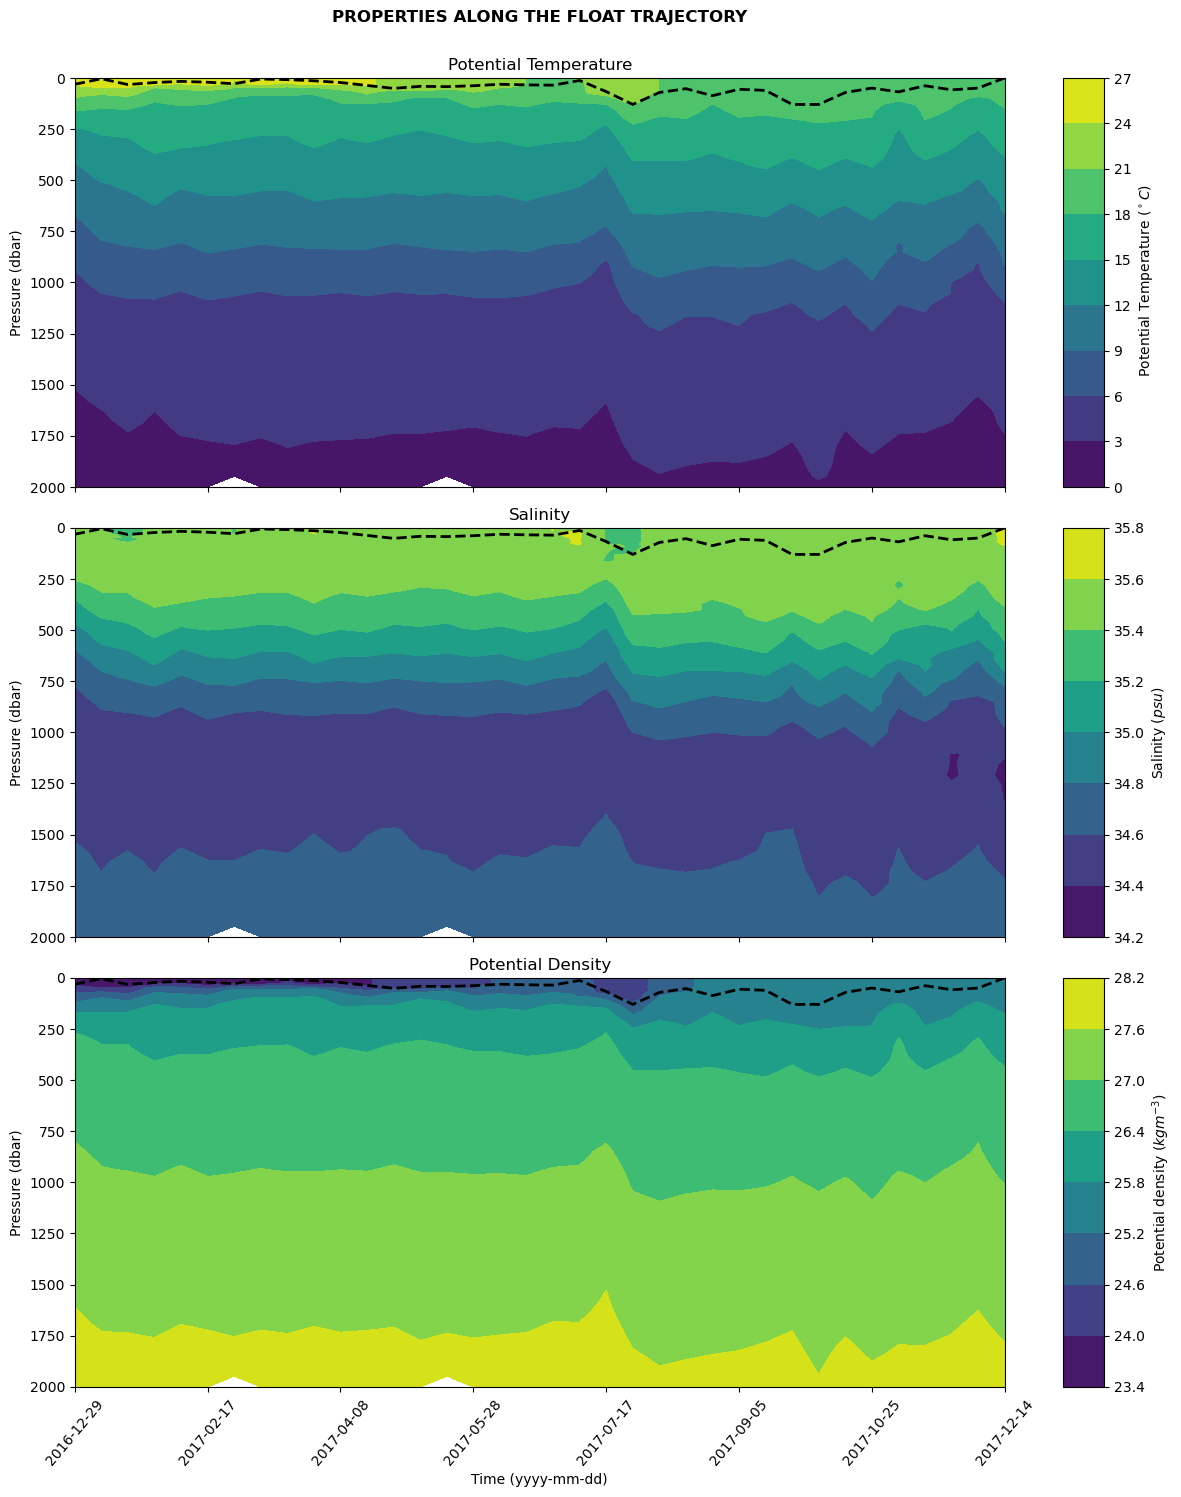

In [15]:
#print('Show your plot here')
#==========================================

#Extract the required variables from the dataset
ptmp=interp_ds['ptmp'] 
pres=interp_ds['pres']
time=interp_ds['time'] 
psal=interp_ds['psal']
pden=interp_ds['pden']
p=np.linspace(0,2000,120)

#Create a 3x1 grid of subplots and set the figure size
fig,ax=plt.subplots(3, 1, figsize=(15,17), sharex='all') 

#Add a title to the entire figure
plt.suptitle('Properties along the float trajectory'.upper(),x=0.435, y=0.92,fontweight='bold')

#Create lists of the variables and titles to be plotted
data=[ptmp, psal, pden]
title=['Potential temperature', 'Salinity', 'Potential density']
labels=[' Potential Temperature (${^\circ}C$)', 'Salinity ($psu$)', 'Potential density ($kgm^{-3}$)']

#Iterate over each variable to be plotted
for i, v in enumerate(data):
    cb = ax[i].contourf(time, pres, v.T) #Create a contour plot of the variable
    ax[i].plot(time, mld_depth, c='black', linewidth=2, linestyle='--') #Plot the MLD depth 
    ax[i].set_xticks(time[::5])
    ax[i].tick_params(axis='x', rotation=50)
    ax[i].set_title(title[i].title())
    ax[i].set_ylabel('Pressure (dbar)')
    ax[i].invert_yaxis()
    if i==0:
        plt.colorbar(cb, ax=ax[i],label=labels[i], aspect=10)
    elif i==1:
        plt.colorbar(cb, ax=ax[i],label=labels[i], aspect=10)
    elif i==2 :
        plt.colorbar(cb, ax=ax[i],label=labels[i], aspect=10)
        ax[i].set_xlabel('Time (yyyy-mm-dd)')
    
#Adjust the vertical spacing between the subplots    
plt.subplots_adjust(hspace=0.1)

#Show the plot
plt.show()

<u>**Question 3**</u>
- Comment on the variations of each variable along the float trajectory, including the mixed
 layer. 
- Remember that the float makes measurements at different time and location all along its   trajectory. Which variations do you think you can attribute to time and which to space? 
Hint: Look at the float trajectory to infer if the float crosses regions with major differences in   thermohaline properties.


<u>**Answer**</u>
- <b>Potential Temperature Profile </b>: Warmer water masses are found in the upper layers of the ocean, while colder water masses are found at greater depths, that is the  temperature of the water decreases with increasing depth. During the summer months, the warm surface waters form a stable warm layer at the top, with a steep thermocline than during the winter months due to that the mixed layer is deeper compared to the summer.

  <b>Salinity Profile </b>: Saline water masses are found in the upper layers of the ocean. The salinity decreases with depth up to about $1000 dbar$ and then it inceases again with depth, thus having cold saline water masses at the greater depth. The mixed layer is shallow and the halocline is more pronounced in the summer compared to the winter.
  
  <b>Potential Density Profile </b>: Denser water masses are found at greater depths, while less dense water masses are found in the upper layers of the ocean. The density increases with increasing depth with summer months showing greater variation than the winter month. The mixed layer is deeper and the pynocline is less pronounced in the winter compared to the summer.
  

- By analyzing the trajectory of a float and observing the potential temperature, salinity, and potential density variables,I think the variations in potential temperature and potential density are mainly influenced by space, since they are highly affected by the characteristics of the water masses that the float encounters as it moves. On the other hand, the salinity variations is likely more influenced by time, as they can be affected by local precipitation, evaporation, and river runoff, which can change significantly over short or long time intervals. I also think that factors affecting these variables are often complex and intertwined, making it difficult to distinguish the influence of time and space completely.


<u>**Question 4 (float specific questions)**</u>

Float number: 1902076 
- Describe the interesting temperature and salinity anomalies between July and September  2017.
- From this plot and the figure of the float trajectory and properties at the surface you produced above, can you infer what these anomalies might correspond to?
Hint:  You can take a look at Beal et al. 2011 [here](https://www.nature.com/articles/nature09983.pdf)
- Do the anomalies in temperature and salinity match your expectations?

Float number: 5900280
- Note the deep mixed layers (~ 500 m deep) captured by the float. In which season do they form?  Which water mass form in these deep mixed layers?
- Looking at the  figure you just made, what seems to be the dominant driver for the  formation of these deep mixed layers (i.e. temperature or salinity)? Which processes do you  think could lead to the formation of these deep mixed layers?
Hint: You can take a look at Sallée et al. (2006) [here](https://doi.org/10.1007/s10236-005-0054-x)

Float number:  5900159 
- There is a temperature inversion in summer in the top 200 m. From this plot and the figure of vertical profiles you produced above,  can you formulate an hypothesis to explain this feature?

Float number: 4900555
- Over the winter of 2007, the mixed layer is especially deep (~500 m). Comment on the difference between the onset of the deepening and the shoaling of the mixed, especially regarding the duration of each phase. What are the possible drivers of these types of events?

Float number: 4901076
- Estimate the averaged speed of the current the float drifts in between 50°N and 55°N.
- In summer 2010, we observe strong anomalies in temperature and salinity over the top 1 km. Describe these anomalies. How does that translate in terms of density and why? What could this signal in temperature and salinity correspond to?
Hint: You can take a look at the ["Planetary Ocean"](https://mcgill.on.worldcat.org/oclc/1003263679) by Michèle Fieux (Section 4.2.1.3)

Float number: 4901093
- Estimate the averaged speed of the current the float drifts in between 50°N and 55°N.
- There is a sharp transition in seawater properties around fall 2009. What could be the cause of this transition?
Hint: You can take a look at Bower et al. (2011) [here](https://doi.org/10.1016/j.dsr2.2010.10.060)


<u>**Answer**</u>
- Between July and September 2017, which are typically the coldest months in the region, it can be seen that the region, experienced a warming trend with unusually high sea surface temperatures. This warming trend deepen the mixed layer. At the same time, the surface salinity were lower than the mean surface salinity.

- Beal et al. (2011) discuss the influence of the Agulhas Current on the global ocean circulation and climate, highlighting the important role that the current plays in transporting warm and salty water from the Indian Ocean into the South Atlantic. Based on my understanding from the article, the observed temperature and salinity anomalies in the Agulhas Current region between July and September 2017 could potentially correspond to changes in the strength or path of the current(i.e. changes in wind patterns or oceanic circulation could alter the transport of warm and salty water into the region, leading to the observed warming trend and changes in salinity) which in turn could impact the AMOC and global climate.

- No, The anomalies did not match my expectation. Because I expected high surface temperature to correspond to higher surface salinity. However due to temperature being the dominant driver of the density, it can be shown that, the water masses were less dense, which is expected.

## Plot a T-S diagram

Create a figure displaying $\sigma_0$ in a diagram with potential temperature (y-axis) versus salinity (x-axis) for the 10 first and 10 last locations of the float. You can use the function called scatter from the matplotlib.pyplot package for this plot.<bf>
    
Add the density lines (with labels indicating the associated density) and use colors to differentiate between the 10 profiles (one color per profile). 

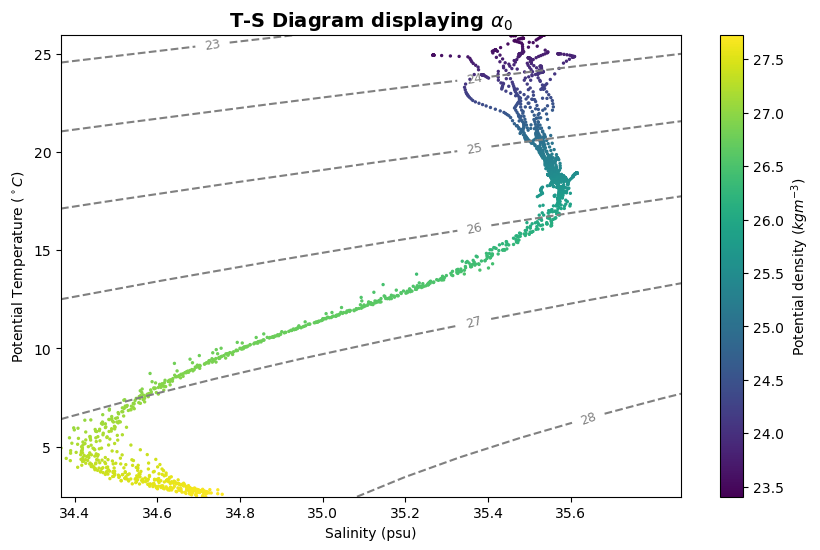

In [16]:
#print('Plot the TS-diagrams here')
#==========================================

#Splitting arrays into first 10 locations
ptmp_first_10=ptmp[:10]
psal_first_10=psal[:10]
pden_first_10=pden[:10]
time_first_10=time[:10]
#Splitting arrays into Last 10 locations
ptmp_last_10=ptmp[-10:]
psal_last_10=psal[-10:]
pden_last_10=pden[-10:]
time_last_10=time[-10:]
#Concatenating first and last 10 locations of each array
ptmp_all = np.concatenate((ptmp_first_10, ptmp_last_10))
psal_all = np.concatenate((psal_first_10, psal_last_10))
pden_all = np.concatenate((pden_first_10, pden_last_10))
time_all = np.concatenate((time_first_10, time_last_10))
# Setting up plot
fig, ax = plt.subplots(1,1, figsize=(10,6))

#Creating a scatter plot of psal_all vs. ptmp_all with color-coded pden_all values
cb=ax.scatter(psal_all, ptmp_all, c=pden_all, s=2, zorder=2)
cb=plt.colorbar(cb)
cb.set_label('Potential density ($kgm^{-3}$)')

#Creating a contour plot of density values calculated from Sgrid and Tgrid arrays for the contour lines
T = np.arange(np.nanmin(ptmp_all), np.nanmax(ptmp_all)+1)
S = np.arange(np.nanmin(psal_all), np.nanmax(psal_all)+1)
Tgrid, Sgrid = np.meshgrid(T, S)
density = sw.dens0(Sgrid, Tgrid)-1000
c=ax.contour(Sgrid, Tgrid, density,colors='grey', linestyles='--')

#Adding labels 
plt.clabel(c,  fontsize=9, inline=1)
ax.set_xlabel('Salinity $(psu)$')
ax.set_ylabel('Temperature$({^\circ}C)$')
ax.set_title(r'T-S Diagram displaying $\alpha_0$',fontsize=14, fontweight='bold')


#Setting up x-axis and y-axis limits,ticks and labels
ax.set_xticks(np.arange(34.4,Sgrid.max()-0.6 , step=0.2))
ax.set_xlim(Sgrid.min(), Sgrid.max()-0.5)
ax.set_ylim(Tgrid.min(), Tgrid.max()-0.5)
ax.set_xlabel('Salinity (psu)')
ax.set_ylabel('Potential Temperature (${^\circ}C$)')

#show the plot
plt.show()


`Extras`

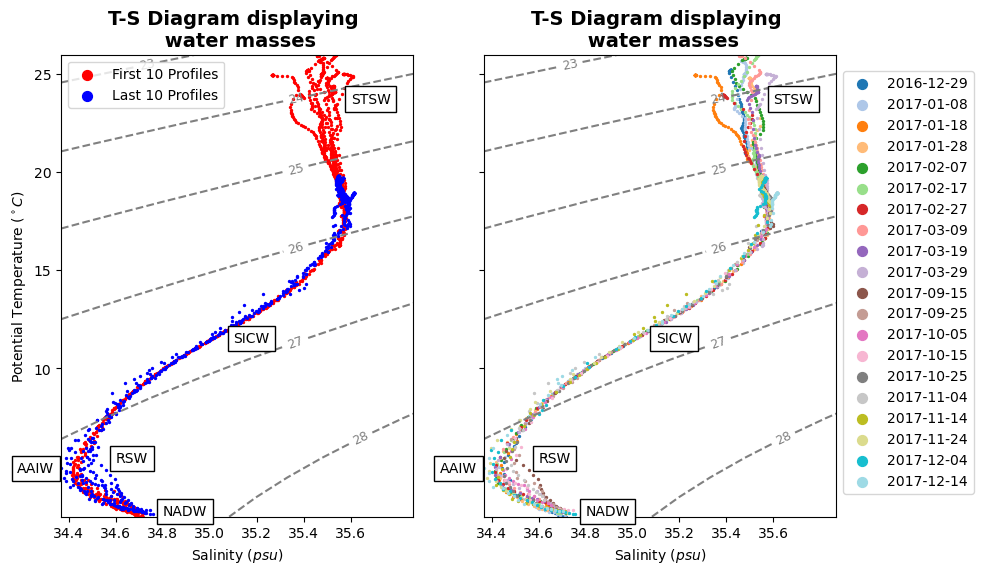

In [17]:
# Seting up plot
fig, ax = plt.subplots(1,2 ,figsize=(10,6), sharey='all')

#converting datetime to date
from datetime import *
date = np.empty([])
for i in time_all:
    dt = datetime.strptime(np.datetime_as_string(i, unit='D'), '%Y-%m-%d')
    date = np.append(date, dt.strftime('%Y-%m-%d'))
date_all=date[1:]

#First plot
#Creating two scatter plots to show the first 10 and last 10 profiles
ax[0].scatter(psal_first_10, ptmp_first_10, color='red',label='First 10 Profiles', s=2, zorder=2)
ax[0].scatter(psal_last_10, ptmp_last_10, color='blue',label='Last 10 Profiles', s=2, zorder=2)
ax[0].legend(markerscale=5) #Adding a legend to the plot

#Second plot
#Creating 1 scatter plot to show all 20 profiles and the date as a legend
colors = plt.cm.tab20(np.linspace(0, 1, 20))
for i in range(20):
    ax[1].scatter(psal_all[i], ptmp_all[i],c=np.array([colors[i]]), label=date_all[i], s=2, zorder=2)
    ax[1].legend(markerscale=5, bbox_to_anchor=(1, 0.98)) #Adding a legend to the plot

#Creating a contour plot of density values calculated from Sgrid and Tgrid arrays from previous plot
for i in range(2):
    c=ax[i].contour(Sgrid, Tgrid, density,colors='grey', linestyles='--')
    ax[i].set_title('T-S Diagram displaying \n water masses',fontsize=14, fontweight='bold')
    
    #Setting up x-axis and y-axis limits,ticks and labels
    ax[i].set_xticks(np.arange(34.4,Sgrid.max()-0.6 , step=0.2))
    ax[i].set_xlim(Sgrid.min(), Sgrid.max()-0.5)
    ax[i].set_ylim(Tgrid.min(), Tgrid.max()-0.5)
    ax[i].set_xlabel('Salinity $(psu)$')
    ax[0].set_ylabel('Potential Temperature (${^\circ}C$)')
    plt.clabel(c,  fontsize=9, inline=1)
    loc_x=[35.6,35.1,34.8, 34.6, 34.18]
    loc_y=[23.5,11.3, 2.5, 5.2, 4.7]
    water_masses=['STSW','SICW','NADW','RSW','AAIW']
    for j in range(5):
        ax[i].text(loc_x[j], loc_y[j],water_masses[j], color='black', fontsize=10, 
                   bbox=dict(facecolor='white', edgecolor='black'))
    
#show the plot
plt.show()

<u>**Question 5**</u>

- Describe the overall shape of the T-S diagram. <br>
Float number:  5900159 : Does it look like the typical T-S diagram shown in textbooks? 
- Can you identify some of the water masses characteristic of the region?
Hint: You can look at oceanography textbooks or descriptive papers of the region to help you   identify the water masses.



<u>**Answer**</u>
-  The T-S diagram exhibits an inverted 'S' shape, which is influenced by the distribution and characteristics of various water masses in the region. The upper right corner of the diagram corresponds to a warm and saline water mass, while the middle region is characterized by water with lower temperature and salinity compared to the upper surface. In the lower left corner, there is a cold and lowest saline water mass. The bottom position of the diagram is dominated by a water mass characterized by relatively cold , saline and dense water. The shape of the T-S diagram somewhat mimicks with the shape of the vertical profile of salinity plotted above.

- Water Masses
    - **STSW (Subtropical Surface Water):** The STSW is typically characterized by relatively warm and salty water that has been transported southwards from the subtropical regions of the Indian Ocean. It tends to have a relatively low nutrient content due to its surface origin.
    - **SICW (South Indian Ocean Central Water):** The SICW is typically characterized by water that has been transported from the southern Indian Ocean at intermediate depths. It tends to have a relatively low temperature and salinity compared to other STSW, and may have a higher nutrient content than the STSW.
    - **RSW (Red Sea Water):** The RSW is characterized by relatively warm and salty water that has originated from the Red Sea and has been transported southwards through the Mozambique Channel by the Agulhas Current. It is often associated with a distinct temperature and salinity signature due to its unique origin.
    - **AAIW (Antarctic Intermediate Water):** The AAIW is characterized by water that has been formed in the Southern Ocean and has spread northwards into the Indian Ocean at intermediate depths. It tends to have a relatively low temperature and salinity compared to other water masses.
    - **NADW (North Atlantic Deep Water):** The NADW is characterized by relatively cold and dense water that has been formed in the North Atlantic and has spread southwards into the Southern Ocean at depths below about 2000 meters. It tends to have a relatively high nutrient content due to its deep origin.


Reference for the water mass :
+ Biastoch et al. (2013) [here](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1002/grl.50243)
+ Phoma et al. (2018) [here](https://www.nature.com/articles/s41598-018-28939-0)
+ Braby et al. (2022) [here](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2021JC018107)

**THANK YOU, IT WAS A NICE EXERCISE!!!**